### Uji Hipotesis - Model Prediksi BTC-USD 

In [1]:
# lib statistic 
import scipy.stats as sc

# lib manipulation dataset
import pandas as pd
import numpy as np

# lib data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# lib min-max scaler
from sklearn.preprocessing import MinMaxScaler

### Load Dataset

In [2]:
# load dataset
dataset = pd.read_excel("dataset/hasil_penelitian.xlsx", sheet_name="hasil evaluasi")
print(np.round(dataset[:5],3))

   LSTM-R  LSTM-MAE  LSTM-RMSE  LSTM-MAPE  GRU-R  GRU-MAE  GRU-RMSE  GRU-MAPE
0   0.996     0.013      0.019      0.031  0.997    0.016     0.025     0.033
1   0.996     0.015      0.020      0.036  0.998    0.014     0.021     0.028
2   0.997     0.012      0.020      0.026  0.998    0.014     0.022     0.028
3   0.997     0.013      0.021      0.026  0.997    0.009     0.014     0.022
4   0.996     0.015      0.020      0.037  0.998    0.012     0.018     0.025


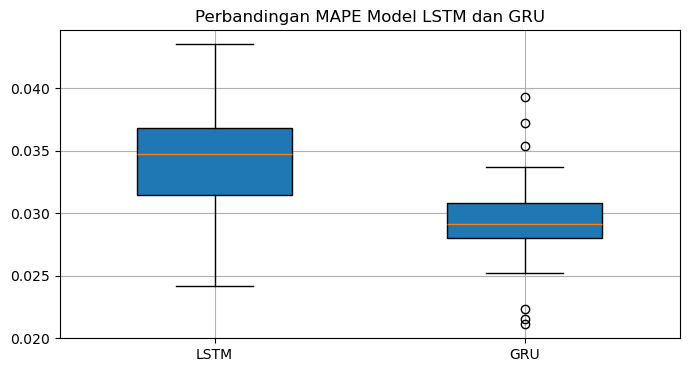

In [3]:
# define boxplot
fig, ax = plt.subplots(figsize=(8,4))
ax.boxplot(dataset[["LSTM-MAPE", "GRU-MAPE"]], labels=['LSTM', 'GRU'], patch_artist=True, widths=(0.5, 0.5))

# set labels
ax.set_title('Perbandingan MAPE Model LSTM dan GRU')
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(True)

# show boxplot
plt.show()

### Hypothesis Test of Non-parametric

- Normalize Min-Max Scaler

In [4]:
# min-max scaler
scaler = MinMaxScaler(feature_range=(0,1))

# process min-max 
LSTM_R = scaler.fit_transform(np.array(dataset["LSTM-R"]).reshape(-1,1))
LSTM_MAPE = scaler.fit_transform(np.array(dataset["LSTM-MAPE"]).reshape(-1,1))

# process min-max
GRU_R = scaler.fit_transform(np.array(dataset["GRU-R"]).reshape(-1,1))
GRU_MAPE = scaler.fit_transform(np.array(dataset["GRU-MAPE"]).reshape(-1,1))

- Normality Test with Shapiro-Wilk

In [5]:
# Hipotesa Awal
# H0 = Nilai R dan MAPE terdistribusi normal
# H2 = Nilai R dan MAPE TIDAK terdistribusi normal

# Interpretasi hasil:
# - p-value > 0.05: Data berdistribusi normal
# - p-value <= 0.05: Data tidak berdistribusi normal

In [6]:
print("Data tidak terdistribusi normal")
print("GRU-MAPE  :",np.round(sc.shapiro(GRU_MAPE).pvalue,2))
print("LSTM-MAPE :",np.round(sc.shapiro(LSTM_MAPE).pvalue,2))

print("\nData terdistribusi normal")
print("GRU-R  :",np.round(sc.shapiro(GRU_R).pvalue,4))
print("LSTM-R :",np.round(sc.shapiro(LSTM_R).pvalue,4))

Data tidak terdistribusi normal
GRU-MAPE  : 0.19
LSTM-MAPE : 0.31

Data terdistribusi normal
GRU-R  : 0.0
LSTM-R : 0.0


- Mann-Whitney Test

In [7]:
# Hipotesa Awal
# H0 = Maetode GRU lebih baik dari Metode LSTM
# H1 = Maetode GRU TIDAK lebih baik dari Metode LSTM

# Interpretasi hasil:
# p-value < 0.05 = Terima H0
# p-value > 0.05 = Terima H1

In [8]:
# Mann-Whitney Test
MAPE = np.round(sc.mannwhitneyu(LSTM_MAPE, GRU_MAPE).pvalue,4)

# Intrepetasi hasil
if MAPE < 0.05:
  print("Karena p-value:",MAPE,"maka Terima H0")
else :
  print("Karena p-value:",MAPE,"maka Terima H1")

Karena p-value: [0.1857] maka Terima H1


- Wilcoxon Rank Test

In [9]:
# Wilcoxon Rank Test
MAPE = np.round(sc.wilcoxon(LSTM_MAPE, GRU_MAPE).pvalue,4)

# Intrepetasi hasil
if MAPE < 0.05:
  print("Karena p-value:",MAPE,"maka Terima H0")
else :
  print("Karena p-value:",MAPE,"maka Terima H1")

Karena p-value: [0.3285] maka Terima H1


- Kruskal-Wallis Test

In [10]:
# Kruskal-Wallis Test
MAPE = np.round(sc.kruskal(LSTM_MAPE, GRU_MAPE).pvalue,4)

# Intrepetasi hasil
if MAPE < 0.05:
  print("Karena p-value:",MAPE,"maka Terima H0")
else :
  print("Karena p-value:",MAPE,"maka Terima H1")

Karena p-value: [0.1833] maka Terima H1
